In [455]:
%run init.ipynb
%run gates.ipynb
%run states.ipynb
%run ptr.ipynb
%run jupyterQ.ipynb
%run entropy.ipynb

# Complementarity relation
For a given coherence measures $C$, it is possible to find one or more predictability measure $P$ such that
\begin{equation}
C(\rho_{A})+P(\rho_{A}) \le u(d_{A}),
\end{equation}
with $u(d_{A})$ beind a function only of the system dimension $d_{A}$. In principle, for pure states $|\psi\rangle_{AB}$, it is possible to find a quantum correlation measure $A$ that completes the above CR such that
\begin{equation}
C(\rho_{A})+P(\rho_{A})+Q(|\psi\rangle_{AB}) = u(d_{A}).
\end{equation}

## Werner-like one qubit state
We begin with a one-qubit state
\begin{equation}
\rho_{w,x} = w|\psi\rangle\langle\psi|+(1-w)\mathbb{I}_{2}/2,
\end{equation}
with $|\psi\rangle=\sqrt{x}|0\rangle+\sqrt{1-x}|1\rangle$.

In [22]:
def rho_wx(w,x):
    psi = sqrt(x)*cb(2,0) + sqrt(1-x)*cb(2,1)
    return w*proj(psi)+(1-w)*id(2)/2

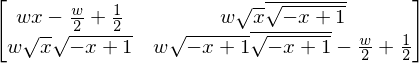

In [5]:
x,w=symbols('x w', positive=True, real=True); simplify(rho_wx(w,x))

Purification
\begin{equation}
|\psi\rangle_{AB} = (-\sqrt{1-x}|0\rangle_{A} + \sqrt{x}|1\rangle_{A})\otimes\sqrt{\frac{1-w}{2}}|0\rangle_{B}+ (\sqrt{x}|0\rangle_{A} + \sqrt{1-x}|1\rangle_{A})\otimes\sqrt{\frac{1+w}{2}}|1\rangle_{B}.
\end{equation}

In [195]:
psiAB_xw = TP((-sqrt(1-x)*cb(2,0)+sqrt(x)*cb(2,1)),(sqrt((1-w)/2)*cb(2,0))) \
        + TP((sqrt(x)*cb(2,0)+sqrt(1-x)*cb(2,1)),(sqrt((1+w)/2)*cb(2,1))) 
#simplify(psiAB_xw)

In [199]:
rhoAB_xw = proj(psiAB_xw)#; simplify(rhoAB_xw)

In [201]:
rhoA_xw = ptraceB(2,2,rhoAB_xw)#; simplify(rhoA_xw)

# $l_{1}$-norm complementarity
\begin{equation}
C_{l_{1}}(\rho_{A})+P_{l_{1}}(\rho_{A})+Q_{l_{1}}(\rho_{A})=d_{A}-1
\end{equation}
with $\rho_{A}=Tr_{B}(|\psi\rangle_{AB}\langle\psi|$)
## $l_{1}$-norm coherence
\begin{equation}
C_{l_{1}}(\rho_{A}) = \sum_{j\ne k}|\rho^{A}_{j,j}| = 2\sum_{j<k}|\rho^{A}_{j,j}|
\end{equation}

In [6]:
def coh_l1(rho):
    d=rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

In [35]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}')#; rho1qb(r1,r2,r3)
simplify(coh_l1(rho1qb(r1,r2,r3)))

In [45]:
simplify(coh_l1(rho_wx))

## $l_{1}$-norm predictability
\begin{equation}
P_{l_{1}}(\rho_{A}) = d-1-\sum_{j\ne k}\sqrt{\rho^{A}_{j,j}\rho^{A}_{k,k}}= d-1-2\sum_{j<k}\sqrt{\rho^{A}_{j,j}\rho_{k,k}}
\end{equation}

In [62]:
def predict_l1(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            P += sqrt(rho[j,j]*rho[k,k])
    return d-1-2*P

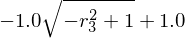

In [49]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_l1(rho1qb(r1,r2,r3)))

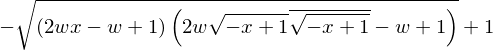

In [50]:
simplify(predict_l1(rho_wx))

## $l_{1}$-norm quantum correlation
\begin{equation}
Q_{l_{1}}(\rho_{AB}) = \sum_{j\ne k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right)=2\sum_{j< k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right),
\end{equation}
with $\rho^{A}=Tr_{B}(\rho_{AB})$

In [64]:
def qcorr_l1(rhoA):
    da = rhoA.shape[0]; qc = 0
    for j in range(0,da-1):
        for k in range(j+1,da):
            qc += sqrt(rhoA[j,j]*rhoA[k,k]) - abs(rhoA[j,k])
    return 2*qc

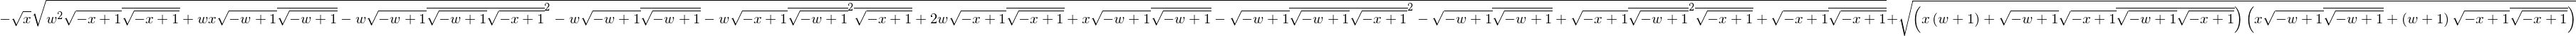

In [31]:
simplify(qcorr_l1(2,2,rhoAB_xw))

# Hilbert-Schmidt complementarity
## Hilbert-Schmidt coherence
\begin{equation}
C_{hs}(\rho) = \sum_{j\ne k}|\rho_{j,k}|^{2} = 2\sum_{j<k}|\rho_{j,k}|^{2}
\end{equation}

In [87]:
def coh_hs(rho):
    d=rho.shape[0]; C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += (abs(rho[j,k]))**2
    return 2*C

In [41]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_hs(rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear predictability
\begin{equation}
P_{hs}(\rho) = \sum_{j}(\rho_{j,j})^{2}-1/d_{A}
\end{equation}

In [364]:
def predict_hs(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d):
        P += abs(rho[j,j])**2
    return P-1/d

In [39]:
r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_hs_l(rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear quantum correlation
\begin{equation}
Q_{hs}(\rho_{AB}) = S_{l}(\rho_{A}) = 1-Tr(\rho_{A}^{2}).
\end{equation}

In [197]:
def qcorr_hs(rhoA):
    return linear_entropy(rhoA)

In [203]:
rhoA = ptraceB(2,2,rhoAB_xw)#; simplify(qcorr_hs(rhoA))

# Wigner-Yanase complementarity
## Wigner-Yanase coherence
\begin{equation}
C_{wy}(\rho) = \sum_{j\ne k}|(\sqrt{\rho})_{j,k}|^{2} = 2\sum_{j<k}|(\sqrt{\rho})_{j,k}|^{2}
\end{equation}

In [396]:
def coh_wy(rho):
    d=rho.shape[0]#; rho_sqrt = mat_sqrt(d,rho) # for symbolics
    rho_sqrt = scipy.linalg.sqrtm(rho) # for numerics
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho_sqrt[j,k])**2
    return 2*C

In [397]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_wy(rho1qb(r1,r2,r3)))

## Wigner-Yanase predictability
It is the same as $P_{hs}$.

## Wigner-Yanase quantum correlation
\begin{equation}
Q_{wy}(\rho_{AB}) = \sum_{j=1}^{d_{A}}\left(\langle j|\sqrt{\rho_{A}}|j\rangle^{2} - \langle j|\rho_{A}|j\rangle^{2}\right)
\end{equation}

In [398]:
def qcorr_wy(rhoA):
    da = rhoA.shape[0]#; rhoA_sqrt = mat_sqrt(rhoA) # for symbolics
    rhoA_sqrt = scipy.linalg.sqrtm(rhoA) # for numerics
    qc=0
    for j in range(0,da):
        qc += (rhoA_sqrt[j,j]**2 - rhoA[j,j]**2)
    return qc

In [63]:
#simplify(qcorr_wy(2,2,rhoAB_xw))

# Relative entropy complementarity
\begin{equation}
C_{re}(\rho_{A})+P_{re}(\rho_{A})+Q_{re}(|\psi\rangle_{AB}) = \log_{2}(d_{A})
\end{equation}
with $\rho_{A}=Tr_{B}(|\psi\rangle_{AB}\langle\psi|)$
## Relative entropy coherence
\begin{equation}
C_{re}(\rho_{A}) = S(\rho^{A}_{diag})-S(\rho_{A}),
\end{equation}
with $\rho^{A}_{diag}=diag(\rho^{A}_{1,1},\rho^{A}_{2,2},\cdots,\rho^{A}_{d,d})$.

In [460]:
def coh_re(rhoA):
    da = rhoA.shape[0]; pv = zeros(da,1)
    for j in range(0,da):
        pv[j] = abs(rho[j,j])
    return shannon_num(pv) - von_neumann_num(rhoA) # for numerics
    #return shannon(pv) - von_neumann(rhoA) # for symbolics

In [166]:
#coh_re(rho1qb(0,0,0.99))

## Relative entropy predictability
\begin{equation}
P_{re}(\rho) = \log_{2}(d)+\sum_{j=1}^{d}\rho_{jj}\log_{2}(\rho_{jj})
\end{equation}

In [413]:
def predict_re(rho):
    d=rho.shape[0]; P = 0
    for j in range(0,d):
        P += abs(rho[j,j])*log(abs(rho[j,j]),2)
    return log(d,2)+P

In [168]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_re(rho1qb(r1,r2,r3)))

## Relative entropy quantum correlation
\begin{equation}
Q_{re}(|\psi\rangle_{AB}) = S_{vn}(\rho_{A})
\end{equation}

In [416]:
def qcorr_re(rhoA):
    return von_neumann_num(rhoA) # for numerics
    #return von_neumann_num(rhoA) # for symbolics

# IBMQE tests: Werner-like states

## Experimental

In [273]:
N = 11; de = 1/(N-1); we = np.zeros(N*N); xe = np.zeros(N*N); Ce = np.zeros(N*N); Pe = np.zeros(N*N); Qe = np.zeros(N*N)
path0 = '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/werner_data/rodada_1/'
for k in range(0,N):
    path1 = path0 + str(k) + '/rho_qc/'
    for j in range(0,N):
        path2 = path1 + str(j) + '.npy'#; print(path2)
        rhoAB = np.load(path2,'r'); rho = ptraceA(2,2,rhoAB)#; 
        we[j+N*k] = j*de; xe[j+N*k] = k*de
        #Ce[j+N*k] = coh_l1(rho); Pe[j+N*k] = predict_l1(rho); Qe[j+N*k] = qcorr_l1(rho)
        #Ce[j+N*k] = coh_hs(rho); Pe[j+N*k] = predict_hs(rho); Qe[j+N*k] = qcorr_hs(rho)
        #Ce[j+N*k] = coh_wy(rho); Pe[j+N*k] = predict_hs(rho); Qe[j+N*k] = qcorr_wy(rho)
        Ce[j+N*k] = coh_re(rho); Pe[j+N*k] = predict_re(rho); Qe[j+N*k] = qcorr_re(rho)

## Theoretical

In [274]:
N = 11; de = 1/(N-1); w = np.zeros(N*N); x = np.zeros(N*N); C = np.zeros(N*N); P = np.zeros(N*N); Q = np.zeros(N*N)
for j in range(0,N):
    for k in range(0,N):
        w[j+N*k] = j*de; x[j+N*k] = k*de; rho = rho_wx(w[j+N*k],x[j+N*k])
        #C[j+N*k] = coh_l1(rho); P[j+N*k] = predict_l1(rho); Q[j+N*k] = qcorr_l1(rho) # l1-norm
        #C[j+N*k] = coh_hs(rho); P[j+N*k] = predict_hs(rho); Q[j+N*k] = qcorr_hs(rho) # hilbert-schmidt
        #C[j+N*k] = coh_wy(rho); P[j+N*k] = predict_hs(rho); Q[j+N*k] = qcorr_wy(rho) # wigner-yanase
        C[j+N*k] = coh_re(rho); P[j+N*k] = predict_re(rho); Q[j+N*k] = qcorr_re(rho) # relative entropy
        #print('w={0:1.2f}'.format(w[j+N*k]),', x={0:1.2f}'.format(x[j+N*k]),', C={0:1.2f}'.format(C[j+N*k]),', P={0:1.2f}'.format(P[j+N*k]),', Q={0:1.2f}'.format(Q[j+N*k]))

## Plots

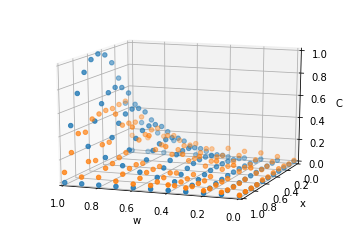

In [275]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1)
ax.scatter3D(w,x,C); ax.scatter3D(we,xe,Ce); ax.view_init(15,110)

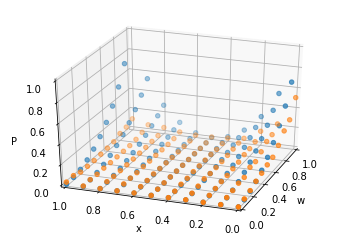

In [276]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('P')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1)
ax.scatter3D(w,x,P); ax.scatter3D(we,xe,Pe); ax.view_init(30,200)

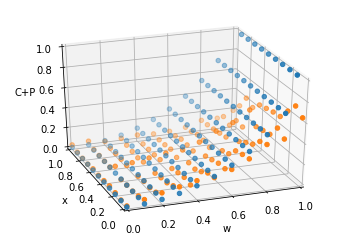

In [277]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C+P')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1)
ax.scatter3D(w,x,C+P); ax.scatter3D(we,xe,Ce+Pe); ax.view_init(30,250)

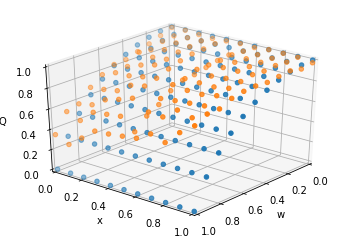

In [278]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('Q')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1)
ax.scatter3D(w,x,Q); ax.scatter3D(we,xe,Qe); ax.view_init(30,40)

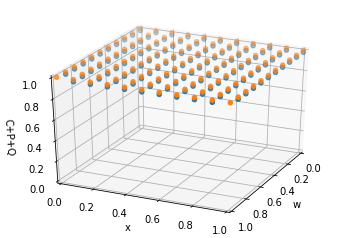

In [279]:
ax = plt.axes(projection='3d'); ax.set_xlabel('w'); ax.set_ylabel('x'); ax.set_zlabel('C+P+Q')
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,1)
ax.scatter3D(w,x,C+P+Q-0.02); ax.scatter3D(we,xe,Ce+Pe+Qe);  ax.view_init(30,25)

# IBMQE tests: Random states

In [462]:
N = 100; di1 = np.zeros(N); Ce1 = np.zeros(N); Pe1 = np.zeros(N); Qe1 = np.zeros(N)
Ce1t = np.zeros(N); Pe1t = np.zeros(N); Qe1t = np.zeros(N)
path0 = '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/random_data/2qubits_london/'
for j in range(0,N):
    di1[j] = 2
    # experiment
    path1 = path0 + 'rho_qc/' + str(j) + '.npy'
    rhoAB = np.load(path1,'r'); rho = ptraceA(2,2,rhoAB)
    rho = np.array(rho).astype(np.cdouble) # for numerics
    #Ce1[j] = coh_l1(rho); Pe1[j] = predict_l1(rho); Qe1[j] = qcorr_l1(rho); ub1 = 1
    #Ce1[j] = coh_hs(rho); Pe1[j] = predict_hs(rho); Qe1[j] = qcorr_hs(rho); ub1 = 1/2
    #Ce1[j] = coh_wy(rho); Pe1[j] = predict_hs(rho); Qe1[j] = qcorr_wy(rho); ub1 = 1/2
    Ce1[j] = coh_re(rho); Pe1[j] = predict_re(rho); Qe1[j] = qcorr_re(rho); ub1 = log(2,2)
    # theory
    #path2 = path0 + 'psi_qc/' + str(j) + '.npy'; psiAB = np.load(path2,'r'); rhoAB = proj(psiAB)
    #rhot = ptraceA(2,2,rhoAB); print('j=',j,', psi=',simplify(psiAB))
    #Ce1t[j] = coh_l1(rhot); Pe1t[j] = predict_l1(rhot); Qe1t[j] = qcorr_l1(rhot)

In [463]:
N = 150; di2 = np.zeros(N); Ce2 = np.zeros(N); Pe2 = np.zeros(N); Qe2 = np.zeros(N)
path0 = '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/random_data/3qubits_ibmqx2/rho_qc/'
for j in range(0,N):
    di2[j] = 4
    # experiment
    path1 = path0 + str(j) + '.npy'
    rhoAB = np.load(path1,'r'); rho = ptraceA(2,4,rhoAB)
    rho = np.array(rho).astype(np.cdouble) # for numerics
    #Ce2[j] = coh_l1(rho); Pe2[j] = predict_l1(rho); Qe2[j] = qcorr_l1(rho); ub2 = 3
    #Ce2[j] = coh_hs(rho); Pe2[j] = predict_hs(rho); Qe2[j] = qcorr_hs(rho); ub2 = 3/4
    #Ce2[j] = coh_wy(rho); Pe2[j] = predict_hs(rho); Qe2[j] = qcorr_wy(rho); ub2 = 3/4
    Ce2[j] = coh_re(rho); Pe2[j] = predict_re(rho); Qe2[j] = qcorr_re(rho); ub2 = log(4,2)

In [461]:
N = 200; di3 = np.zeros(N); Ce3 = np.zeros(N); Pe3 = np.zeros(N); Qe3 = np.zeros(N)
path0 = '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/random_data/4qubits_real_ibmqx2/rho_reduced/'
for j in range(0,N):
    di3[j] = 8
    # experiment
    path1 = path0 + str(j) + '.npy'; rho = np.load(path1,'r')
    rho = np.array(rho).astype(np.cdouble) # for numerics
    #Ce3[j] = coh_l1(rho); Pe3[j] = predict_l1(rho); Qe3[j] = qcorr_l1(rho); ub3 = 7
    #Ce3[j] = coh_hs(rho); Pe3[j] = predict_hs(rho); Qe3[j] = qcorr_hs(rho); ub3 = 7/8
    #Ce3[j] = coh_wy(rho); Pe3[j] = predict_hs(rho); Qe3[j] = qcorr_wy(rho); ub3 = 7/8
    Ce3[j] = coh_re(rho); Pe3[j] = predict_re(rho); Qe3[j] = qcorr_re(rho); ub3 = log(8,2)

TypeError: can't convert complex to float

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

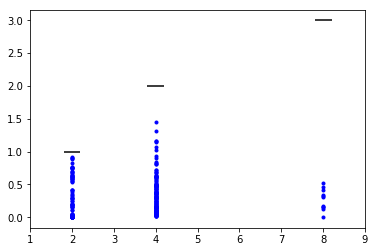

In [464]:
plt.scatter(di1,Ce1,marker='.',color='blue'); plt.scatter(di2,Ce2,marker='.',color='blue')
plt.scatter(di3,Ce3,marker='.',color='blue')
plt.hlines(ub1,1.8,2.2,color='black'); plt.hlines(ub2,3.8,4.2,color='black'); plt.hlines(ub3,7.8,8.2,color='black')
plt.xlim(1,9); plt.ylim(0,ub3+0.1); plt.xlabel('Dimension'); plt.ylabel('C'); plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

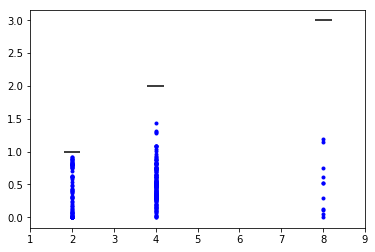

In [465]:
plt.scatter(di1,Pe1,marker='.',color='blue'); plt.scatter(di2,Pe2,marker='.',color='blue')
plt.scatter(di3,Pe3,marker='.',color='blue')
plt.hlines(ub1,1.8,2.2,color='black'); plt.hlines(ub2,3.8,4.2,color='black'); plt.hlines(ub3,7.8,8.2,color='black')
plt.xlim(1,9); plt.ylim(0,ub3+0.1); plt.xlabel('Dimension'); plt.ylabel('P'); plt.show()

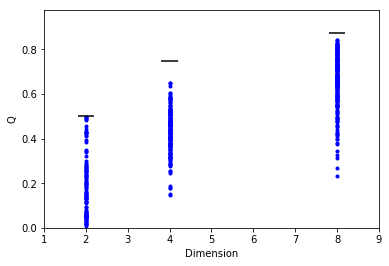

In [444]:
plt.scatter(di1,Qe1,marker='.',color='blue'); plt.scatter(di2,Qe2,marker='.',color='blue')
plt.scatter(di3,Qe3,marker='.',color='blue')
plt.hlines(ub1,1.8,2.2,color='black'); plt.hlines(ub2,3.8,4.2,color='black'); plt.hlines(ub3,7.8,8.2,color='black')
plt.xlim(1,9); plt.ylim(0,ub3+0.1); plt.xlabel('Dimension'); plt.ylabel('Q'); plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

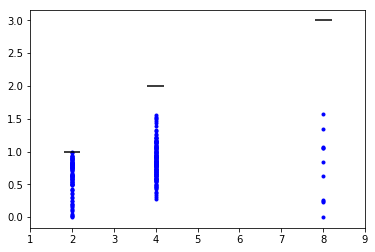

In [466]:
plt.scatter(di1,Ce1+Pe1,marker='.',color='blue'); plt.scatter(di2,Ce2+Pe2,marker='.',color='blue')
plt.scatter(di3,Ce3+Pe3,marker='.',color='blue')
plt.hlines(ub1,1.8,2.2,color='black'); plt.hlines(ub2,3.8,4.2,color='black'); plt.hlines(ub3,7.8,8.2,color='black')
plt.xlim(1,9); plt.ylim(0,ub3+0.1); plt.xlabel('Dimension'); plt.ylabel('C+P'); plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

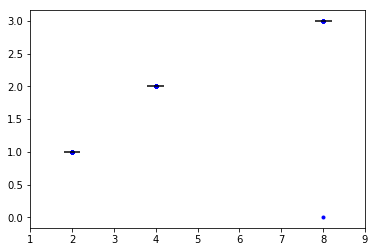

In [467]:
plt.scatter(di1,Ce1+Pe1+Qe1,marker='.',color='blue'); plt.scatter(di2,Ce2+Pe2+Qe2,marker='.',color='blue')
plt.scatter(di3,Ce3+Pe3+Qe3,marker='.',color='blue')
plt.hlines(ub1,1.8,2.2,color='black'); plt.hlines(ub2,3.8,4.2,color='black'); plt.hlines(ub3,7.8,8.2,color='black')
plt.xlim(1,9); plt.ylim(ub1-0.1,ub3+0.1); plt.xlabel('Dimension'); plt.ylabel('C+P+Q'); plt.show()

it is ok for l1, hs, wy, ve?